## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*Diagnostic Analysis*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*To see which variables are likely to affect the quality of red wine the most, I ran a correlation analysis of our independent variables against our dependent variable, quality. This analysis ended up with a list of variables of interest that had the highest correlations with quality.



###1. These variables are used as independent features:
1. Alcohol: The amount of alcohol in wine
2. Volatile acidity: acetic acid in wine which leads to an unpleasant vinegar taste.
3. Sulphates: An additive that acts as an antimicrobial and antioxidant
4. Citric Acid: As a preservative to increase acidity.
5. Total Sulfur Dioxide: Amount of free + bound forms of SO2.
6. Density: The sweeter wines have a higher density.
7. Chlorides: An amount of salt in the wine.
8. Fixed acidity: Non-volatile acids that do not evaporate readily.
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine.
11. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)

###2.  we require for predicting the red wine quality  
12. quality
It is found that the 5 and 6 are popular of the medium/average values.*

## Data Collection

**Q3. From where do we get our data?**

*TODO*

available on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality).



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/AIDI/0005/winequality-red.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*I obtained the red wine samples from the north of Portugal to model red wine quality based on physicochemical tests.*


**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*By analyzing the physicochemical tests samples data of red wines from the north of Portugal, I was able to create a model (like a machine learning model suchas Decision Tree or Random Forest) that can help wine industry producers, distributors, and sellers predict the quality of red wine products and have a better understanding of each critical and up-to-date features.
In the experiment we can implement the Decision Tree, Random Forests and other models. the results from these models will made easy to analyse the most influential features and the specific features for the desireed output*


Check the shape of data, and the datatypes of the features</li>

In [2]:
print(data.shape)
print(data.size)
print(type(data))

(1599, 12)
19188
<class 'pandas.core.frame.DataFrame'>


Understand the data by carrying out any steps that you think are necessary

In [3]:
# Take a look at the first few rows
print(data.head())

# Looking at the ST_NUM column
print((data.isnull()).sum())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Data Preparation

#### Explore the dataset further
*TODO*





<li>Check for missing values and handle if any</li>

In [4]:
# Looking at the ST_NUM column
print((data.isnull()).sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<li>Check for outliers if any and handle them</li>

In [5]:
# Looking at the ST_NUM column
print((data.isnull()).sum())
print((data.isna()).sum())


# Outlier
data.describe()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

import numpy as np
from scipy import stats
def is_normal(x, treshhold = 0.05):
    k2,p = stats.normaltest(x)
    print(p)
    print(p > treshhold)
    print('\n')
    return p > treshhold

for name in list(data):
    is_normal(np.array(data))


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol   

<li>Implement Correlation heatmap</li>

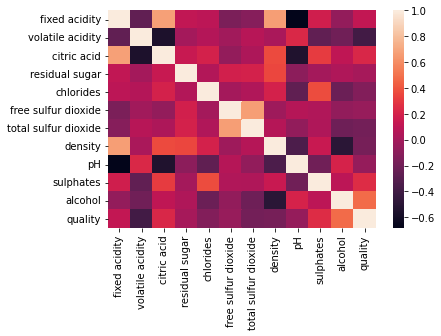

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())

# displaying heatmap
plt.show()


<li>Check the distribution of data using histograms</li>

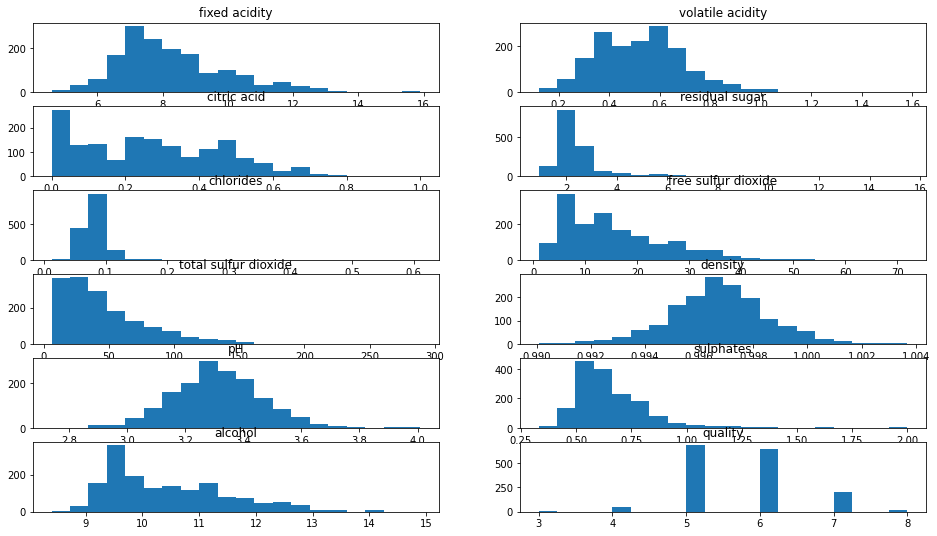

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(6, 2, figsize=(16,9))
axes[0,0].set_title("fixed acidity")
axes[0,0].hist(data['fixed acidity'], bins=20);

axes[0,1].set_title("volatile acidity")
axes[0,1].hist(data['volatile acidity'], bins=20);

axes[1,0].set_title("citric acid")
axes[1,0].hist(data['citric acid'], bins=20);

axes[1,1].set_title("residual sugar")
axes[1,1].hist(data['residual sugar'], bins=20);

axes[2,0].set_title("chlorides")
axes[2,0].hist(data['chlorides'], bins=20);

axes[2,1].set_title("free sulfur dioxide")
axes[2,1].hist(data['free sulfur dioxide'], bins=20);

axes[3,0].set_title("total sulfur dioxide")
axes[3,0].hist(data['total sulfur dioxide'], bins=20);

axes[3,1].set_title("density")
axes[3,1].hist(data['density'], bins=20);

axes[4,0].set_title("pH")
axes[4,0].hist(data['pH'], bins=20);

axes[4,1].set_title("sulphates")
axes[4,1].hist(data['sulphates'], bins=20);

axes[5,0].set_title("alcohol")
axes[5,0].hist(data['alcohol'], bins=20);

axes[5,1].set_title("quality")
axes[5,1].hist(data['quality'], bins=20);

<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_data = scaler.fit_transform(data)
normal_data = pd.DataFrame(data, columns = data.columns)
print(normal_data.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_dsta = scaler.fit_transform(data)
normal_data = pd.DataFrame(normal_data, columns = data.columns)

X = normal_data.drop(["quality"], axis = 1)
y = data["quality"]
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)
print(X_test, y_test)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
644             9.9             0.540         0.45  ...  3.39       0.62      9.4
99              8.1             0.545         0.18  ...  3.30       0.59      9.0
1586            7.5             0.310         0.41  ...  3.34       0.85     11.4
59              7.3             0.390         0.31  ...  3.41       0.54      9.4
992             6.5             0.400         0.10  ...  3.36       0.48      9.4
...             ...               ...          ...  ...   ...        ...      ...
284             9.9             0.590         0.07  ...  3.31       0.71      9.8
396             6.6             0.735         0.02  ...  3.47       0.53      9.9
287             7.5             0.400         0.12  ...  3.37       0.70     10.3
561             9.0             0.440         0.49  ...  3.23       0.58      9.2
391            13.7             0.415         0.68  ...  3.06       0.80     10.0

[480 rows x 11 

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

1. Accuracy of Random Forest 0.6770833333333334
MAE       MSE                R2
0.35625 0.42291666666666666 -0.004991955113659685


2. Accuracy of Decision Tree 0.6604166666666667
MAE       MSE                R2
0.4041666666666667 0.5458333333333333 0.13838817750190124


Feature: 0, Score: 0.07628
Feature: 1, Score: 0.10237
Feature: 2, Score: 0.07226
Feature: 3, Score: 0.06843
Feature: 4, Score: 0.07347
Feature: 5, Score: 0.06444
Feature: 6, Score: 0.09809
Feature: 7, Score: 0.08919
Feature: 8, Score: 0.06922
Feature: 9, Score: 0.11085
Feature: 10, Score: 0.17540


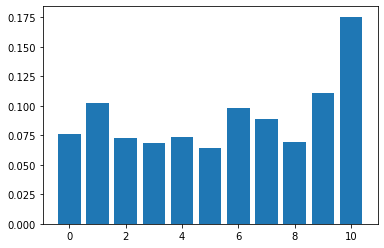

In [12]:
# machine learning
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,max_depth= 10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("1. Accuracy of Random Forest", score)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_pred, y_test)
mse = metrics.mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_pred, y_test) # or mse**(0.5) 
print() 
print("MAE      ", "MSE               ", "R2")
print(mae, mse, r2)


print()
print()
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("2. Accuracy of Decision Tree", score)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_pred, y_test)
mse = metrics.mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_pred, y_test)
print()
print("MAE      ", "MSE               ", "R2")
print(mae, mse, r2)

print()
print()

from matplotlib import pyplot
importance =random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Conclusion

The project begins with the introductions of the data that the data has been acquired from a Portugal. it has 12 columns where the 11 are used as matrix of features **(X)** and the Quality is used as a dependent variable **(y)**.
After acquring the data it has been processed with several functions suchas checking nan values or Null values or anything else. 
Afterwards a coorelation matrix is defiend to evaluate the co-relations amoung the parameters and histogram of all the columns. It is plotted to analyse the outliers in the acquired dataset, However, their is no any outlier is founded in the dataset. 
In the following step, the data scaled using a MinMaxSCaler for the better performance. The scaled data is divided into four different subsets (X_train, X_test, y_train, y_test). These four sets are used to fit, build a model and predict the observations. 
In the end, it is found that the **Decision Tree** (65%) has an accuracy score of 65 percentile while the another model **Random Forest** (68%) score 4 percent more accuracy in the experiement. It is also seen that the variable 9th and 10th has high role of data importance in the process of  redwine quality predictions.
So, in the case of the qualititative redwine the **Random Forest** model acheives higher in the experiment and it won in the project. 